In [1]:
pkg_ver = lambda pkg: "{:<20}{:}".format(pkg.__name__,pkg.__version__)

# ROOT
import uproot
print(pkg_ver(uproot))
import ROOT
#print(pkg_ver(ROOT))

# Machine Learning
import sklearn
print(pkg_ver(sklearn))
import torch
print(pkg_ver(torch))

# Data science
import scipy
print(pkg_ver(scipy))
import numpy
print(pkg_ver(numpy))
import pandas
print(pkg_ver(pandas))
import modin
from modin import pandas as ppandas
print(pkg_ver(modin))

# Uncertainty support
import uncertainties
print(pkg_ver(uncertainties))

# Visualizations
import dexplot
print(pkg_ver(dexplot))
import matplotlib
print(pkg_ver(matplotlib))
plt = matplotlib.pyplot

import tqdm
print(pkg_ver(tqdm))

uproot              4.3.5
Welcome to JupyROOT 6.26/10
sklearn             1.2.0
torch               1.13.1
scipy               1.10.1
numpy               1.24.2
pandas              1.5.3
modin               0.18.1
uncertainties       3.1.7
dexplot             0.1.4
matplotlib          3.6.2
tqdm                4.62.3


In [2]:
file = uproot.open("../../data/2023-02-23/8811/CW100ns/Cs137-iTEDA-A2_D.2023_02_23_T.12_21_13_C.itedABCD_lab_2023.02.22_4.0v_8811_300s.root")
pandas.DataFrame(file.classnames().items(),columns=['Name','Type']).query('(Type == "TTree") & (Name.str.contains("_A"))')

,Name,Type
44,SCATTERER_A;1,TTree
45,ABSORBER_A_1;1,TTree
46,ABSORBER_A_2;1,TTree
47,ABSORBER_A_3;1,TTree
48,ABSORBER_A_4;1,TTree


In [3]:
A_A1 = file["ABSORBER_A_1;1"]
A_A1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TimeStamp            | int64_t                  | AsDtype('>i8')
Total_Deposited_E... | float                    | AsDtype('>f4')
I0                   | float                    | AsDtype('>f4')
Pixel_multiplicity   | int32_t                  | AsDtype('>i4')
Shannon_Entropy      | float                    | AsDtype('>f4')
x_pos_interaction    | float                    | AsDtype('>f4')
y_pos_interaction    | float                    | AsDtype('>f4')
x_anger              | float                    | AsDtype('>f4')
y_anger              | float                    | AsDtype('>f4')
x_var                | float                    | AsDtype('>f4')
y_var                | float                    | AsDtype('>f4')
N_over_I             | float                    | AsDtype('>f4')
doi_interaction      | float                    | AsDtype(

In [4]:
A_A1_df = A_A1.arrays(library="pd")

In [5]:
A_A1_df.describe()

,TimeStamp,Total_Deposited_Energy,I0,Pixel_multiplicity,Shannon_Entropy,x_pos_interaction,y_pos_interaction,x_anger,y_anger,x_var,y_var,N_over_I,doi_interaction,xi2_interaction,tau_interaction,A0,fit_status
count,1.566220e+05,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156618.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.000000,156622.0
mean,1.520233e+14,414.198547,0.795237,44.175793,3.104213,20.809126,22.080181,-0.986707,-0.999990,28.202785,28.225887,0.428840,0.345202,-0.937184,-0.938795,2.864311,0.0
std,8.655854e+13,403.046783,0.078679,23.065524,1.287168,15.733519,15.191613,0.272358,0.256073,6.940028,7.089231,1.119781,58.583881,0.246185,0.239706,479.374329,0.0
min,1.851504e+12,4.000347,0.171008,1.000000,-0.000344,-349.694885,-100.533539,-2.040520,-1.941667,3.333333,3.333333,0.000835,-1.000000,-1.000000,-1.000000,0.000000,0.0
25%,7.707357e+13,52.281919,0.751971,22.000000,2.375707,9.400000,9.400000,-1.165352,-1.148832,25.345581,25.307722,0.019888,-1.000000,-1.000000,-1.000000,0.000000,0.0
50%,1.521295e+14,260.267517,0.778480,58.000000,3.858521,21.799999,21.799999,-0.974668,-0.999509,28.529472,28.561758,0.056094,-1.000000,-1.000000,-1.000000,0.000000,0.0
75%,2.271842e+14,862.237106,0.832388,64.000000,4.030318,34.200001,34.200001,-0.860617,-0.869188,32.158566,32.238092,0.261050,-1.000000,-1.000000,-1.000000,0.000000,0.0
max,3.018430e+14,2979.447266,1.086637,64.000000,7.807259,105.003372,127.616699,-0.133333,-0.123824,48.541668,51.758175,16.649151,18520.664062,0.304755,0.000000,149152.031250,0.0


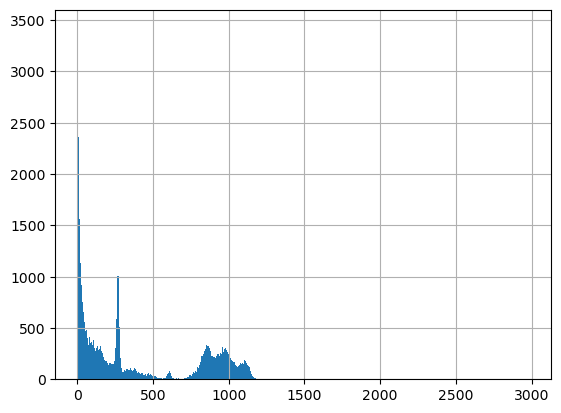

In [6]:
A_A1_df.Total_Deposited_Energy.hist(bins=2000)
plt.show()

In [7]:
pandas.DataFrame(file.classnames().items(),columns=['Name','Type']).query('(Type == "TH1D") & (Name.str.contains("_A")) & (Name.str.contains("_amplitude_spectra;1"))')

,Name,Type
0,SCATTERER_A_amplitude_spectra;1,TH1D
2,ABSORBER_A_1_amplitude_spectra;1,TH1D
4,ABSORBER_A_2_amplitude_spectra;1,TH1D
6,ABSORBER_A_3_amplitude_spectra;1,TH1D
8,ABSORBER_A_4_amplitude_spectra;1,TH1D


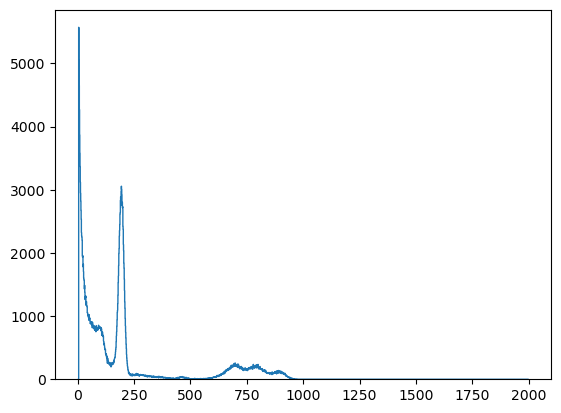

In [8]:
plt.stairs(*file["ABSORBER_A_2_amplitude_spectra;1"].to_numpy())
plt.show()

In [9]:
print("Time of acquisition: {}s".format(round((A_A1_df.TimeStamp.max()-A_A1_df.TimeStamp.min())/10**12)))

Time of acquisition: 300s


In [12]:
A_A1_df.TimeStamp.min()

1851504061147

In [13]:
A_A1_df.TimeStamp.max()

301843026696794